# Assign Initial Weights and Load Company Information
First, we'll assign equal initial weights to each holding in the portfolio and load the company names and sectors for each stock.


In [1]:
%pip install -q yfinance pandas numpy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define the list of stock tickers for the hypothetical portfolio
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "NVDA", "JNJ", "V", "PG", "JPM",
           "UNH", "HD", "MA", "DIS", "PFE", "NFLX", "BAC", "KO", "XOM", "CSCO"]

# Download data for the portfolio
portfolio_data = yf.download(tickers, start="2018-01-01", end="2023-01-01")['Adj Close']

# Download data for the S&P 500 index
sp500_data = yf.download("^GSPC", start="2018-01-01", end="2023-01-01")['Adj Close']


[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
# Assign equal weights to each holding
initial_weights = np.array([1/len(tickers)] * len(tickers))

# Load company names and sectors (manually or from a data source)
company_info = {
    "AAPL": {"Name": "Apple Inc.", "Sector": "Technology"},
    "MSFT": {"Name": "Microsoft Corp.", "Sector": "Technology"},
    "GOOGL": {"Name": "Alphabet Inc.", "Sector": "Communication Services"},
    "AMZN": {"Name": "Amazon.com Inc.", "Sector": "Consumer Discretionary"},
    "TSLA": {"Name": "Tesla Inc.", "Sector": "Consumer Discretionary"},
    "NVDA": {"Name": "NVIDIA Corp.", "Sector": "Technology"},
    "JNJ": {"Name": "Johnson & Johnson", "Sector": "Health Care"},
    "V": {"Name": "Visa Inc.", "Sector": "Financials"},
    "PG": {"Name": "Procter & Gamble Co.", "Sector": "Consumer Staples"},
    "JPM": {"Name": "JPMorgan Chase & Co.", "Sector": "Financials"},
    "UNH": {"Name": "UnitedHealth Group Inc.", "Sector": "Health Care"},
    "HD": {"Name": "Home Depot Inc.", "Sector": "Consumer Discretionary"},
    "MA": {"Name": "Mastercard Inc.", "Sector": "Financials"},
    "DIS": {"Name": "Walt Disney Co.", "Sector": "Communication Services"},
    "PFE": {"Name": "Pfizer Inc.", "Sector": "Health Care"},
    "NFLX": {"Name": "Netflix Inc.", "Sector": "Communication Services"},
    "BAC": {"Name": "Bank of America Corp.", "Sector": "Financials"},
    "KO": {"Name": "Coca-Cola Co.", "Sector": "Consumer Staples"},
    "XOM": {"Name": "Exxon Mobil Corp.", "Sector": "Energy"},
    "CSCO": {"Name": "Cisco Systems Inc.", "Sector": "Technology"},
}

# Create a DataFrame to store company information
company_df = pd.DataFrame(company_info).T
company_df


,Name,Sector
AAPL,Apple Inc.,Technology
MSFT,Microsoft Corp.,Technology
GOOGL,Alphabet Inc.,Communication Services
AMZN,Amazon.com Inc.,Consumer Discretionary
TSLA,Tesla Inc.,Consumer Discretionary
NVDA,NVIDIA Corp.,Technology
JNJ,Johnson & Johnson,Health Care
V,Visa Inc.,Financials
PG,Procter & Gamble Co.,Consumer Staples
JPM,JPMorgan Chase & Co.,Financials


# Calculate Portfolio Value and Weightings Over Time
We'll calculate the portfolio's value over time and track how the weightings of each holding change over the years.


In [4]:
# Calculate the portfolio value over time
portfolio_value = (portfolio_data * initial_weights).sum(axis=1)

# Calculate the weightings of each stock over time
portfolio_weights = portfolio_data.multiply(initial_weights, axis=1).div(portfolio_value, axis=0)

# Summarize weightings for the start of each year
annual_weights = portfolio_weights.resample('Y').last()

# Merge with company information for better context
annual_weights_with_info = annual_weights.T.merge(company_df, left_index=True, right_index=True)
annual_weights_with_info


,2018-12-31 00:00:00,2019-12-31 00:00:00,2020-12-31 00:00:00,2021-12-31 00:00:00,2022-12-31 00:00:00,Name,Sector
AAPL,0.020889,0.029763,0.039697,0.042529,0.040775,Apple Inc.,Technology
AMZN,0.041603,0.038595,0.049768,0.040539,0.026609,Amazon.com Inc.,Consumer Discretionary
BAC,0.011929,0.013150,0.008501,0.010120,0.010042,Bank of America Corp.,Financials
CSCO,0.020129,0.017274,0.012198,0.014146,0.014289,Cisco Systems Inc.,Technology
DIS,0.059540,0.059943,0.054938,0.037368,0.027306,Walt Disney Co.,Communication Services
GOOGL,0.028911,0.027943,0.026751,0.035182,0.027917,Alphabet Inc.,Communication Services
HD,0.083077,0.081788,0.074498,0.094546,0.096100,Home Depot Inc.,Consumer Discretionary
JNJ,0.061474,0.053873,0.043680,0.038729,0.053468,Johnson & Johnson,Health Care
JPM,0.045663,0.050704,0.035043,0.035617,0.040534,JPMorgan Chase & Co.,Financials
KO,0.022090,0.020088,0.015060,0.013345,0.019229,Coca-Cola Co.,Consumer Staples


# Visualize Portfolio Weightings Over Time
We'll visualize how the weightings of each holding in the portfolio have evolved over time.


<Figure size 1008x576 with 0 Axes>

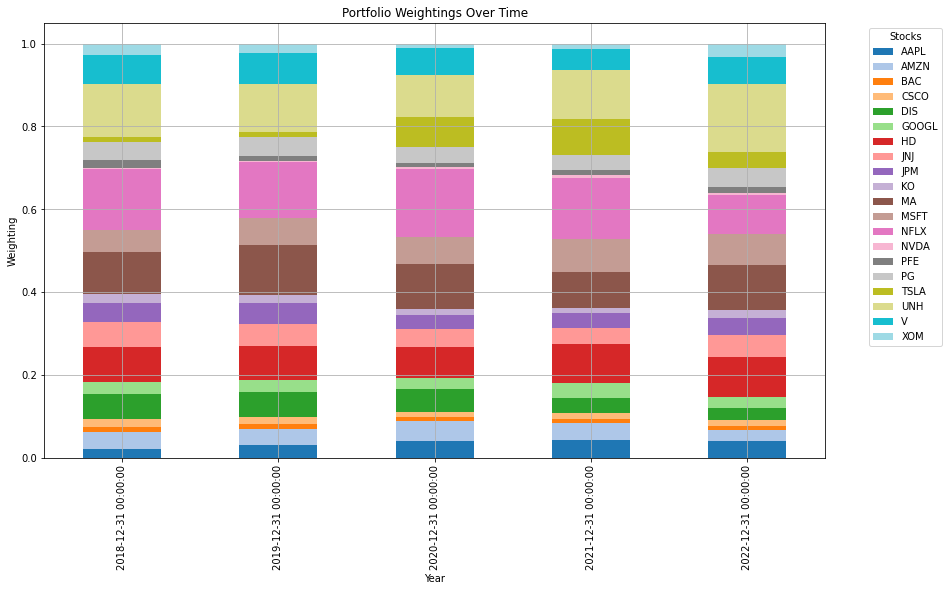

In [5]:
import matplotlib.pyplot as plt

# Plot the weightings of each stock in the portfolio over time
plt.figure(figsize=(14, 8))
annual_weights.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))

plt.title("Portfolio Weightings Over Time")
plt.ylabel("Weighting")
plt.xlabel("Year")
plt.legend(title="Stocks", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


# Conclusion
This example provided an overview of how to build and analyze a hypothetical portfolio of 20 holdings, including how to assign initial weights, track weightings over time, and analyze sector allocations. The visualizations offer insight into the portfolio's structure and how it evolves in response to market conditions, providing a comprehensive view for portfolio management.
